In [1]:
import pandas as pd
from sklearn.preprocessing import normalize
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv("data/data_filtrage_5.csv")

In [3]:
df=data.copy()

/home/rmarrion/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='z_force'>

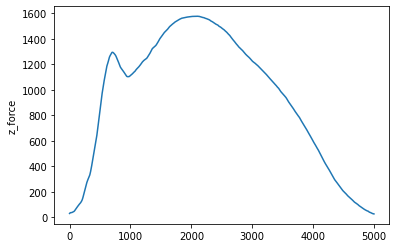

In [4]:
sns.lineplot(df.index[:5000],df['z_force'].iloc[:5000])

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X=df.drop(['index','nb_seance','nb_passage','x_force','z_force','y_force'],axis=1)
#X=df.drop(['index','nb_seance','nb_passage','x_lumbar','y_lumbar','z_lumbar','x_force','z_force','y_force'],axis=1)
y=df['z_force']

In [7]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [8]:
from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)

rfr.score(X_test,y_test)

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

cross_val_score(rfr,X,y,cv=5).mean()

In [10]:
poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X_poly,y,random_state=42,test_size=0.2)
lr = LinearRegression()
cross_val_score(lr,X_poly,y,cv=5).mean()

0.8766799737509718

In [11]:

X_train_tho=X_poly[:-5000,:]
y_train_tho=y[:-5000]
X_test_tho=X_poly[495000:,:]
y_test_tho=y[495000:]
lr_tho = LinearRegression()
lr_tho.fit(X_train_tho, y_train_tho)
y_pred_tho=lr_tho.predict(X_test_tho)

In [12]:
lr_tho.score(X_test_tho,y_test_tho)

0.9753103236184427

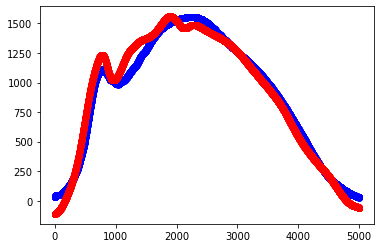

In [13]:
x=range(0,5000)
plt.scatter(x,y_test_tho,color='b')
plt.scatter(x,y_pred_tho,color='r')

In [14]:
def exceptOneValidation(model,X,y,period=5000):
    score=[]
    predict=[]
    error=[]
    for i in range(0,len(X),period):
        if i==0:
            X_train=X.iloc[period:,:]
            y_train=y.iloc[period:]
            X_test=X.iloc[0:period,:]
            y_test=y.iloc[0:period]
        elif i==len(X)-period:
            X_train=X.iloc[0:i,:]
            y_train=y.iloc[0:i]
            X_test=X.iloc[i:i+period,:]
            y_test=y.iloc[i:i+period]
        else:
            X_train=pd.concat([X.iloc[0:i,:],X.iloc[i+period:,:]],axis=0)
            y_train=pd.concat([y.iloc[0:i],y.iloc[i+period:]],axis=0)
            X_test=X.iloc[i:i+period,:]
            y_test=y.iloc[i:i+period]
        model.fit(X_train,y_train)
        y_pred=model.predict(X_test)
        predict=np.concatenate([predict,y_pred])
        score.append(model.score(X_test,y_test))
        error.append(mean_squared_error(y_test,y_pred))
    return score,error,predict

In [15]:
poly = PolynomialFeatures(degree = 3)
X_poly = pd.DataFrame(poly.fit_transform(X))
model=LinearRegression()
score,error,predict=exceptOneValidation(model,X_poly,y,period=5000)

In [16]:
X_poly

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
0,1.0,-0.354351,-0.042948,0.261788,-0.165072,-0.407106,-0.649198,0.125565,0.015219,-0.092765,...,-0.004498,-0.011093,-0.017690,-0.027358,-0.043627,-0.069571,-0.067472,-0.107595,-0.171578,-0.273609
1,1.0,-0.353287,-0.043432,0.263230,-0.162715,-0.406823,-0.646435,0.124811,0.015344,-0.092996,...,-0.004308,-0.010771,-0.017115,-0.026930,-0.042792,-0.067995,-0.067331,-0.106988,-0.170002,-0.270131
2,1.0,-0.352223,-0.043917,0.264676,-0.160352,-0.406543,-0.643677,0.124061,0.015469,-0.093225,...,-0.004123,-0.010453,-0.016551,-0.026503,-0.041961,-0.066437,-0.067192,-0.106385,-0.168439,-0.266688
3,1.0,-0.351161,-0.044405,0.266124,-0.157983,-0.406266,-0.640924,0.123314,0.015593,-0.093452,...,-0.003943,-0.010140,-0.015996,-0.026075,-0.041136,-0.064897,-0.067055,-0.105786,-0.166887,-0.263281
4,1.0,-0.350099,-0.044895,0.267573,-0.155608,-0.405991,-0.638178,0.122569,0.015718,-0.093677,...,-0.003768,-0.009831,-0.015453,-0.025649,-0.040317,-0.063375,-0.066919,-0.105190,-0.165348,-0.259911
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499995,1.0,-1.247857,-0.006365,-0.073970,-0.548191,0.864322,1.466927,1.557148,0.007943,0.092303,...,-0.164738,0.259740,0.440831,-0.409527,-0.695050,-1.179638,0.645694,1.095872,1.859914,3.156645
499996,1.0,-1.248948,-0.005920,-0.073792,-0.548320,0.862967,1.466453,1.559871,0.007393,0.092163,...,-0.164855,0.259455,0.440896,-0.408340,-0.693899,-1.179152,0.642662,1.092085,1.855796,3.153582
499997,1.0,-1.250037,-0.005474,-0.073614,-0.548441,0.861616,1.465974,1.562593,0.006843,0.092020,...,-0.164965,0.259164,0.440947,-0.407153,-0.692740,-1.178644,0.639649,1.088313,1.851681,3.150494
499998,1.0,-1.251125,-0.005028,-0.073434,-0.548556,0.860270,1.465492,1.565315,0.006291,0.091875,...,-0.165068,0.258867,0.440986,-0.405967,-0.691574,-1.178114,0.636656,1.084559,1.847573,3.147386


In [17]:
predict

array([255.99000218, 257.46540953, 258.9413251 , ..., -58.63614012,
       -58.8219377 , -59.00636323])

In [18]:
pd.Series(score).describe()

count    100.000000
mean       0.953241
std        0.045871
min        0.758967
25%        0.947936
50%        0.969987
75%        0.981415
max        0.993349
dtype: float64

In [19]:
pd.Series(error).describe()

count      100.000000
mean     12436.152946
std      12340.442055
min       1727.413829
25%       4731.011569
50%       7931.702140
75%      14022.986373
max      67564.317895
dtype: float64

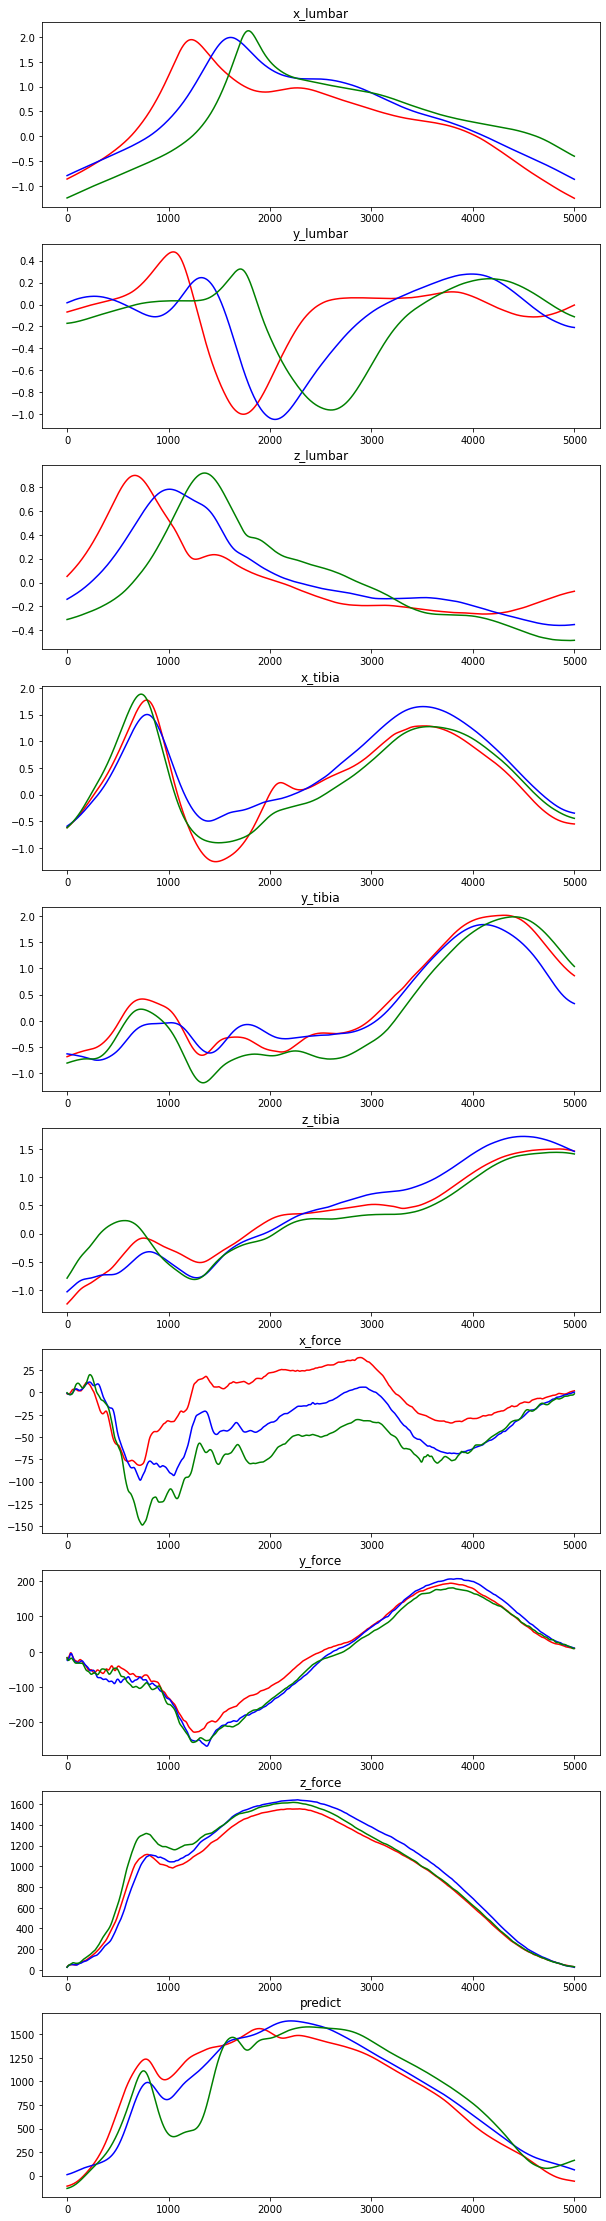

In [20]:
k=99
n=50
i=32
df['predict']=np.vstack(predict)
fig,axes = plt.subplots(10,1,figsize=(10,40))
for row,col in enumerate(df.columns[3:]):
    df[col].iloc[k*5000:k*5000+5000].reset_index(drop=True).plot(ax=axes[row],title=col,color='r')
    df[col].iloc[n*5000:n*5000+5000].reset_index(drop=True).plot(ax=axes[row],color='b')
    df[col].iloc[i*5000:i*5000+5000].reset_index(drop=True).plot(ax=axes[row],color='g')


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
score_dt,error_dt,predict_dt=exceptOneValidation(model,X,y,period=5000)

In [ ]:
pd.Series(score_dt).describe()

In [ ]:
pd.Series(error_dt).describe()

In [ ]:
from sklearn.linear_model import SGDRegressor
model=SGDRegressor()
score_sgd,error_sgd,predict_sgd=exceptOneValidation(model,X,y,period=5000)

In [ ]:
pd.Series(score_sgd).describe()